In [1]:
from chatsky_llm_autoconfig.graph import Graph
from chatsky_llm_autoconfig.algorithms.dialogue_generation import DialogueSampler
from chatsky_llm_autoconfig.dialogue import Dialogue
import networkx as nx
import json

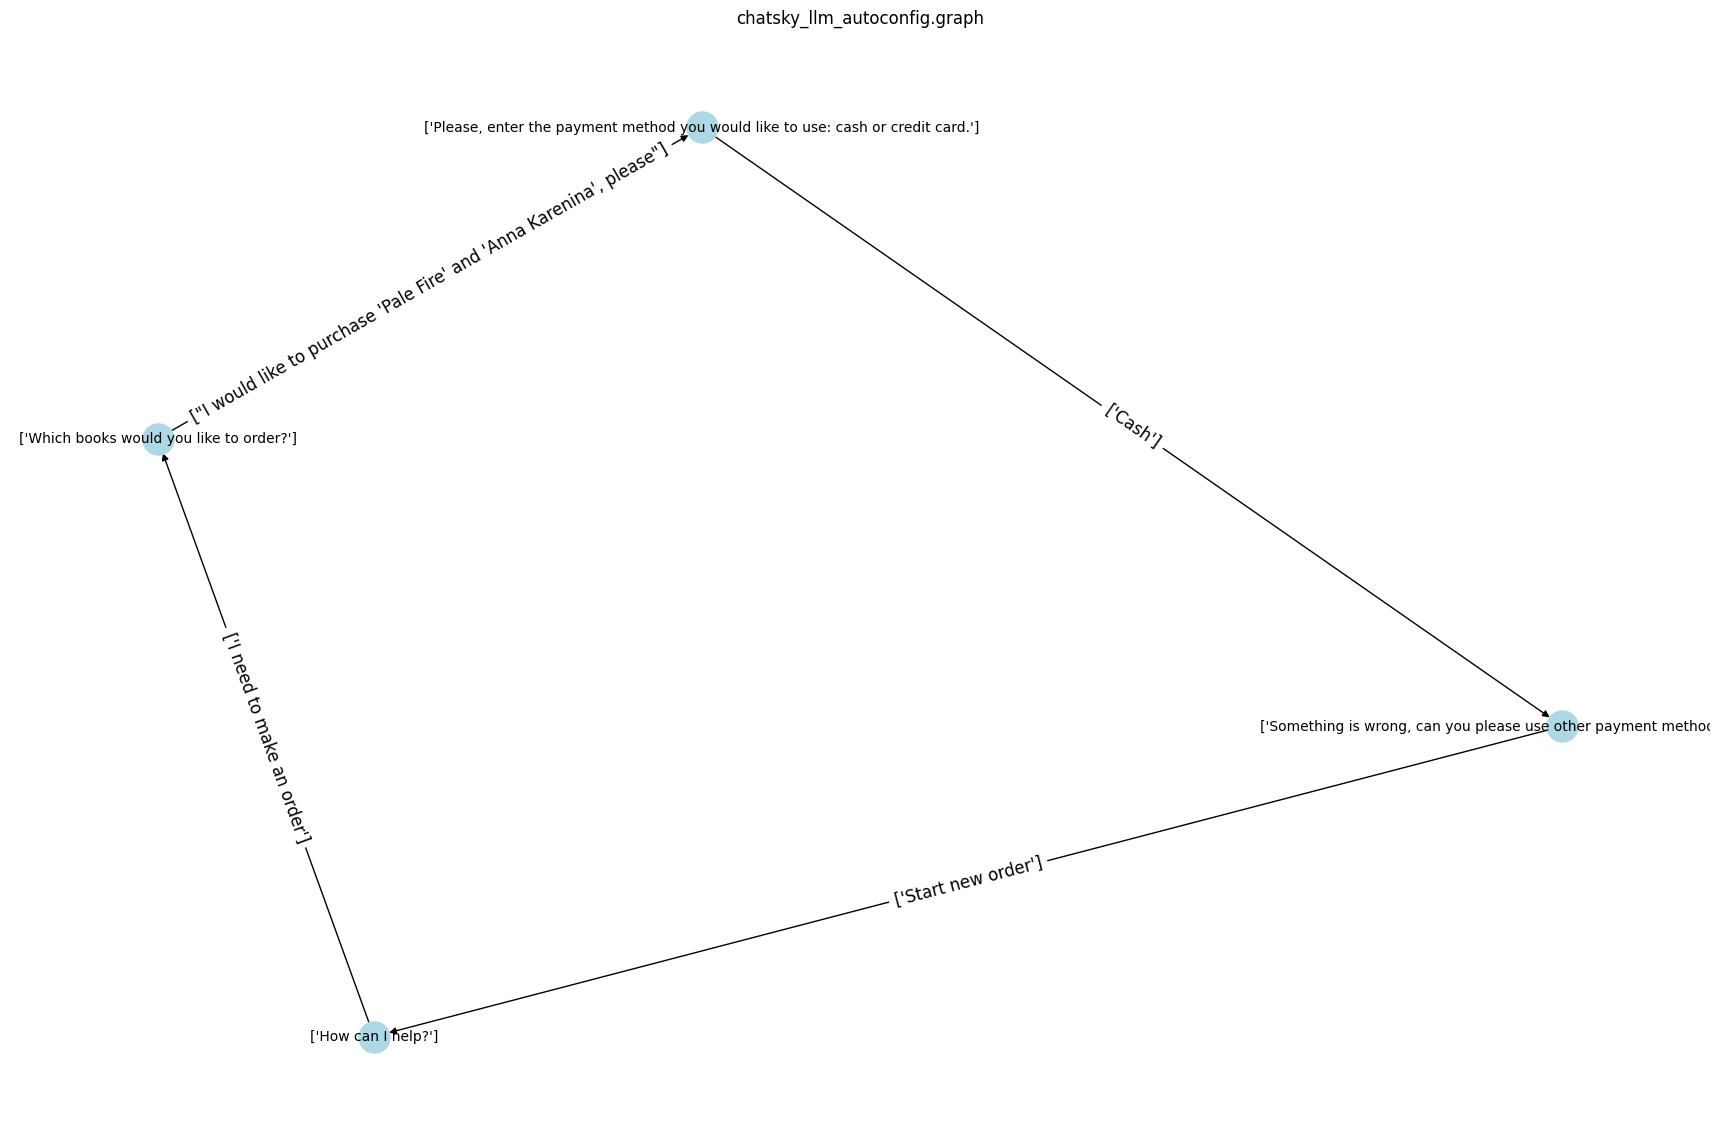

In [2]:
with open('data/data.json', 'r') as f:
    data = json.load(f)

data = data[6]["target_graph"]

g = Graph(data)
g.visualise()

In [4]:
ds = DialogueSampler()
print(ds.invoke(g))

[Dialogue(messages=[DialogueMessage(text='How can I help?', participant='assistant'), DialogueMessage(text='I need to make an order', participant='user'), DialogueMessage(text='Which books would you like to order?', participant='assistant'), DialogueMessage(text="I would like to purchase 'Pale Fire' and 'Anna Karenina', please", participant='user'), DialogueMessage(text='Please, enter the payment method you would like to use: cash or credit card.', participant='assistant'), DialogueMessage(text='Cash', participant='user'), DialogueMessage(text='Something is wrong, can you please use other payment method or start order again', participant='assistant'), DialogueMessage(text='Start new order', participant='user')], topic='')]


In [4]:
# g.graph[2]
a = nx.get_node_attributes(g.graph, 'utterances')
a[1]

['How can I help?']

In [5]:
g.graph.get_edge_data(1, 2)

{'theme': None, 'utterances': ['I need to make an order']}

In [6]:
dialogues = []
a = nx.get_node_attributes(g.graph, 'utterances')
for i in nx.all_simple_paths(g.graph, 1, 4):
    print(i)
    d = []
    for node in range(1, len(i)):
        d.append(a[node][0])
        edge_data = g.graph.get_edge_data(node, node+1)
        if edge_data:
            d.append(g.graph.get_edge_data(node, node+1)['utterances'][0])
    dialogues.append(d)

[1, 2, 3, 4]


In [7]:
dialogues

[['How can I help?',
  'I need to make an order',
  'Which books would you like to order?',
  "I would like to purchase 'Pale Fire' and 'Anna Karenina', please",
  'Please, enter the payment method you would like to use: cash or credit card.',
  'Cash']]